In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('aggregate_covid_country.csv')

In [3]:
df.sample(n = 30)

,Date,Country,Confirmed,Recovered,Deaths
20181,2020-05-08,Georgia,623,288,10
10863,2020-03-19,Saudi Arabia,274,6,0
14069,2020-04-05,South Sudan,1,0,0
21725,2020-05-16,Madagascar,283,114,0
21428,2020-05-14,Western Sahara,6,6,0
6567,2020-02-25,Uganda,0,0,0
23488,2020-05-25,Ukraine,21245,7234,623
19263,2020-05-03,Japan,14877,3981,487
20758,2020-05-11,Iceland,1801,1773,10
22950,2020-05-23,Barbados,92,70,7


In [4]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [5]:
df.shape

(23688, 5)

In [6]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [7]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,23688.0,7969.367528,58421.090425,0.0,0.0,18.0,730.0,1680913.0
Recovered,23688.0,2581.801714,15143.101257,0.0,0.0,1.0,123.0,384902.0
Deaths,23688.0,526.935030,3992.815956,0.0,0.0,0.0,13.0,98913.0


In [10]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [13]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [14]:
unique_countries =list(df['Country'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [54]:
total_confirmed_ctry=df.groupby('Country')['Confirmed']

In [ ]:
total_confirmed_ctry = []
no_cases = []
for i in unique_countries:
    cases = 

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label=le.fit_transform(df['Country'])
le.classes_

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [16]:
df=df.drop('Country',axis='columns')


In [17]:
df.dtypes

Date         datetime64[ns]
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [18]:
df['Country']=label
df

,Date,Confirmed,Recovered,Deaths,Country
0,2020-01-22,0,0,0,0
1,2020-01-22,0,0,0,1
2,2020-01-22,0,0,0,2
3,2020-01-22,0,0,0,3
4,2020-01-22,0,0,0,4
...,...,...,...,...,...
23683,2020-05-26,429,365,3,183
23684,2020-05-26,9,6,1,184
23685,2020-05-26,249,10,49,185
23686,2020-05-26,920,336,7,186


In [19]:
df.isna().sum()

Date         0
Confirmed    0
Recovered    0
Deaths       0
Country      0
dtype: int64

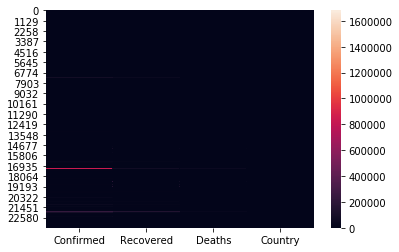

In [20]:
sns.heatmap(df[["Confirmed","Recovered","Deaths","Country"]])  

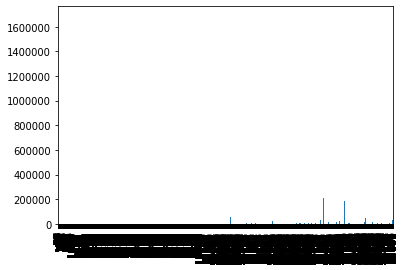

In [21]:
df['Confirmed'].plot.bar()

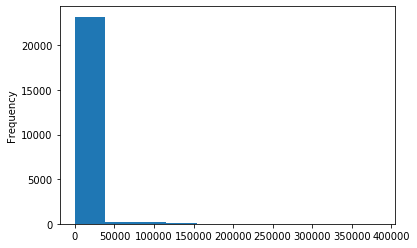

In [22]:
df['Recovered'].plot.hist()

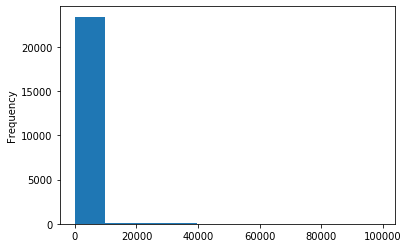

In [23]:
df['Deaths'].plot.hist()

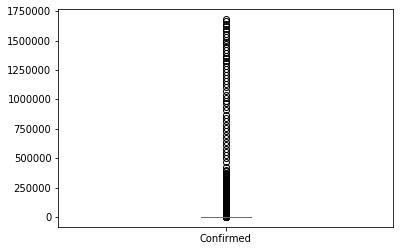

In [24]:
df['Confirmed'].plot.box()

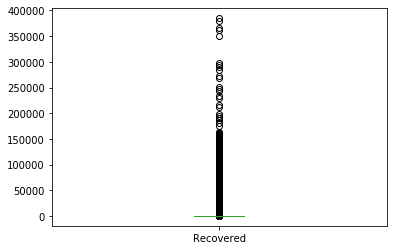

In [25]:
df['Recovered'].plot.box()

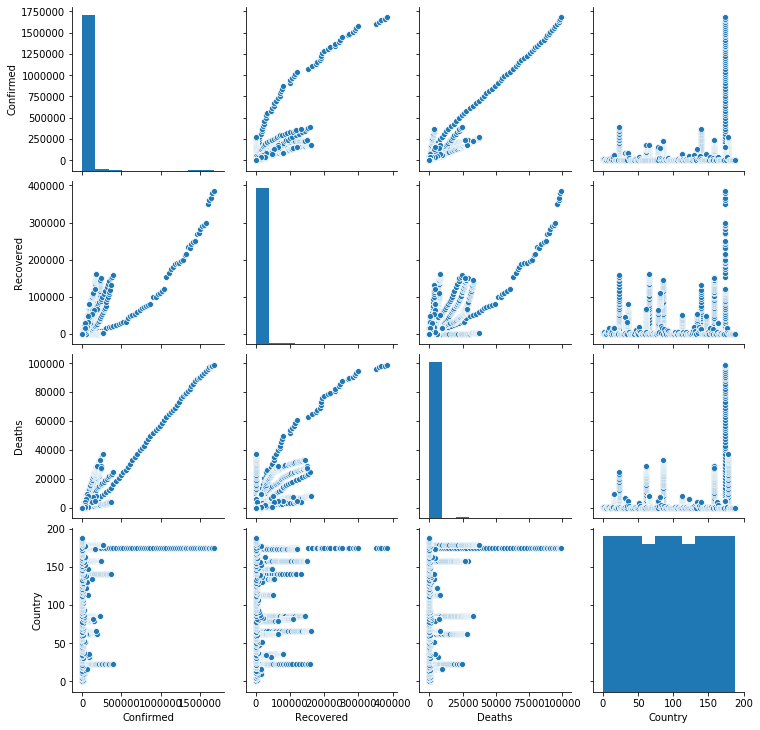

In [26]:
sns.pairplot(df)

In [27]:
dfcor=df.corr()
dfcor

,Confirmed,Recovered,Deaths,Country
Confirmed,1.000000,0.810991,0.929718,0.069204
Recovered,0.810991,1.000000,0.778094,0.019298
Deaths,0.929718,0.778094,1.000000,0.064954
Country,0.069204,0.019298,0.064954,1.000000


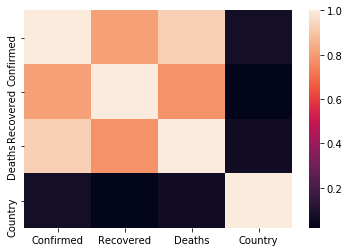

In [28]:
sns.heatmap(dfcor)

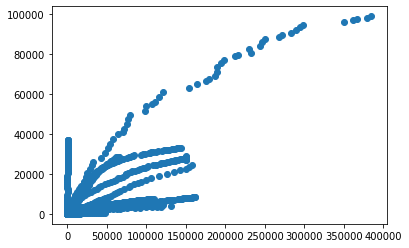

In [29]:
plt.scatter(df['Recovered'],df['Deaths'])
plt.show()

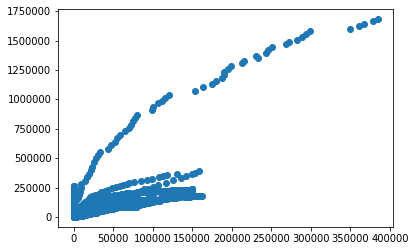

In [30]:
plt.scatter(df['Recovered'],df['Confirmed'])
plt.show()

In [55]:
total_cases=df.groupby('Country')['Confirmed']#sort_values(ascending=False).to_frame

In [56]:
total_cases

In [33]:
collist=df.columns
ncol=9
nrows=10
df.shape

(23688, 5)

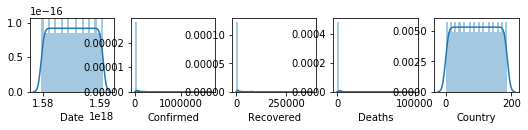

In [34]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    #No skewed distribution of data

In [35]:
total_deaths_date=df.groupby('Date')['Deaths']#sort_values(ascending=False).to_frame

In [36]:
total_deaths_date

Date
2020-01-22    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-23    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-24    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-25    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-26    AxesSubplot(0.125,0.125;0.775x0.755)
                              ...                 
2020-05-22    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-23    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-24    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-25    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-26    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Deaths, Length: 126, dtype: object

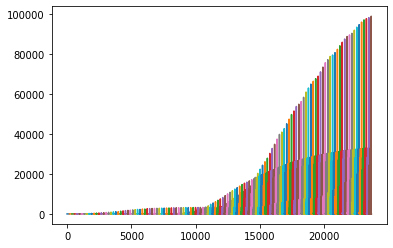

In [37]:
total_deaths_date.plot.line()

In [38]:
total_deaths_ctry=df.groupby('Country')['Deaths']#sort_values(ascending=False).to_frame

In [39]:
total_deaths_ctry

Country
0      AxesSubplot(0.125,0.125;0.775x0.755)
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
183    AxesSubplot(0.125,0.125;0.775x0.755)
184    AxesSubplot(0.125,0.125;0.775x0.755)
185    AxesSubplot(0.125,0.125;0.775x0.755)
186    AxesSubplot(0.125,0.125;0.775x0.755)
187    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Deaths, Length: 188, dtype: object

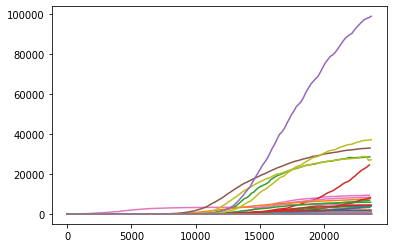

In [40]:
total_deaths_ctry.plot.line()

In [41]:
total_recovered_date=df.groupby('Date')['Recovered']#sort_values(ascending=False).to_frame

In [42]:
total_recovered_date

Date
2020-01-22    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-23    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-24    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-25    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-26    AxesSubplot(0.125,0.125;0.775x0.755)
                              ...                 
2020-05-22    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-23    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-24    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-25    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-26    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Recovered, Length: 126, dtype: object

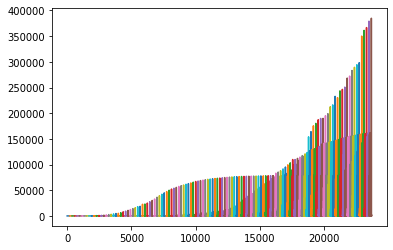

In [43]:
total_recovered_date.plot.line()

In [44]:
total_recovered_ctry=df.groupby('Country')['Recovered']#.sort_values(ascending=False).to_frame

In [45]:
total_recovered_ctry # issue? just type it here! again the values am getting are too high but my code is right
# now right?yes, got your error? sum?, yes, next

Country
0      AxesSubplot(0.125,0.125;0.775x0.755)
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
183    AxesSubplot(0.125,0.125;0.775x0.755)
184    AxesSubplot(0.125,0.125;0.775x0.755)
185    AxesSubplot(0.125,0.125;0.775x0.755)
186    AxesSubplot(0.125,0.125;0.775x0.755)
187    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Recovered, Length: 188, dtype: object

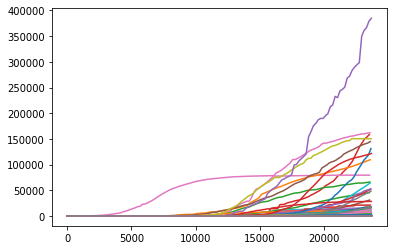

In [46]:
total_recovered_ctry.plot.line()

In [47]:
total_confirmed_date=df.groupby('Date')['Confirmed']

In [48]:
total_confirmed_date

Date
2020-01-22    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-23    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-24    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-25    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-26    AxesSubplot(0.125,0.125;0.775x0.755)
                              ...                 
2020-05-22    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-23    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-24    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-25    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-26    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Confirmed, Length: 126, dtype: object

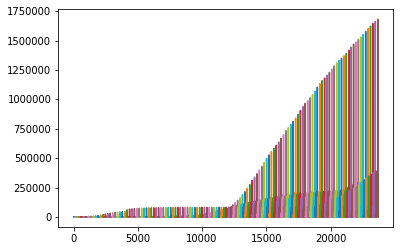

In [49]:
total_confirmed_date.plot.line()

In [50]:
total_confirmed_ctry=df.groupby('Country')['Confirmed']

In [51]:
total_confirmed_ctry

Country
0      AxesSubplot(0.125,0.125;0.775x0.755)
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
183    AxesSubplot(0.125,0.125;0.775x0.755)
184    AxesSubplot(0.125,0.125;0.775x0.755)
185    AxesSubplot(0.125,0.125;0.775x0.755)
186    AxesSubplot(0.125,0.125;0.775x0.755)
187    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Confirmed, Length: 188, dtype: object

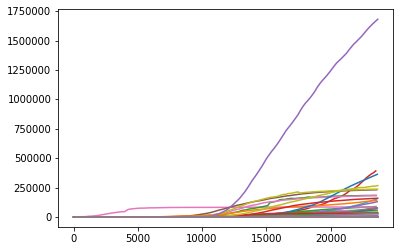

In [52]:
total_confirmed_ctry.plot.line()

In [68]:
df.head()

,Date,Confirmed,Recovered,Deaths,Country
0,2020-01-22,0,0,0,0
1,2020-01-22,0,0,0,1
2,2020-01-22,0,0,0,2
3,2020-01-22,0,0,0,3
4,2020-01-22,0,0,0,4


In [83]:
plt.rcParams['figure.figsize'] = [12.0,8.0]
from datetime import datetime
start_date='2020-1-21'
end_date='2020-5-26'
mask = (df['Date']>start_date) & (df['Date']<=end_date)
df = df.loc[mask]
df.head()

,Date,Confirmed,Recovered,Deaths,Country
188,2020-01-23,0,0,0,0
189,2020-01-23,0,0,0,1
190,2020-01-23,0,0,0,2
191,2020-01-23,0,0,0,3
192,2020-01-23,0,0,0,4


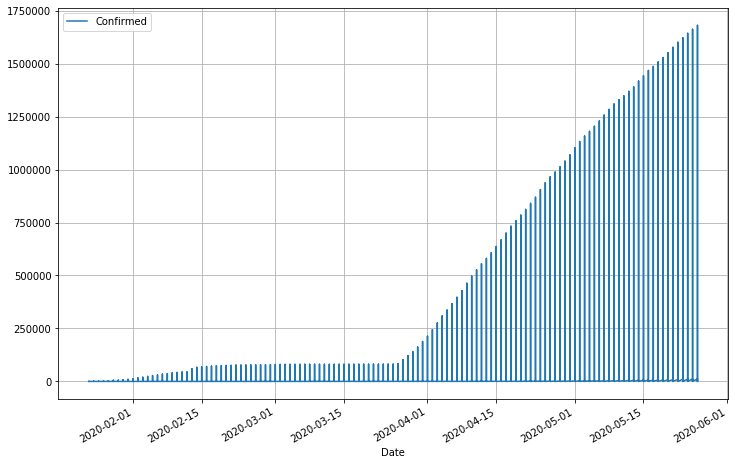

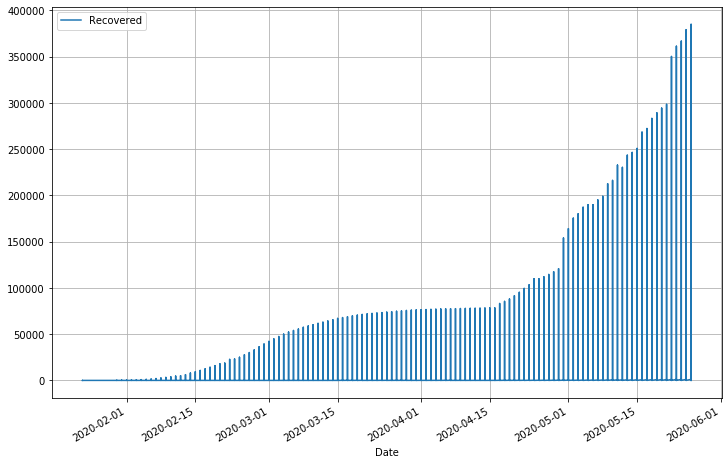

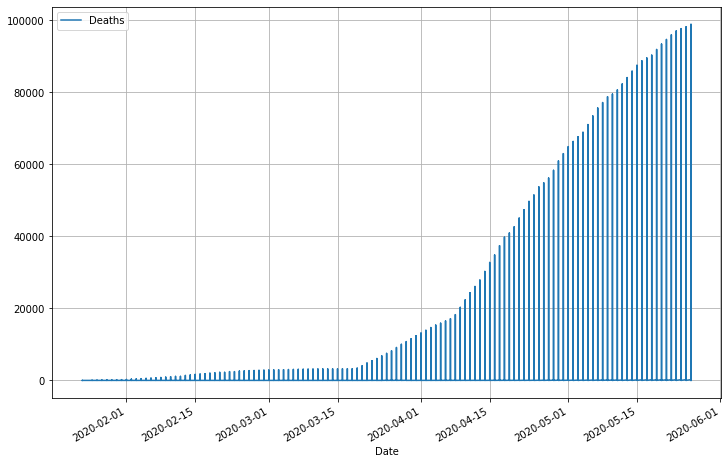

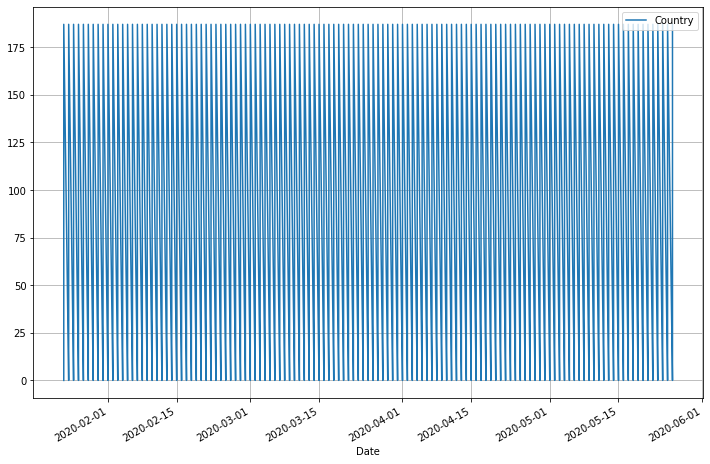

In [87]:
#showing plot of cases by dates
df.plot('Date','Confirmed',grid=True)
df.plot('Date','Recovered',grid=True)
df.plot('Date','Deaths',grid=True)
df.plot('Date','Country',grid=True)

In [88]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [9.0,5.0]

TypeError: float() argument must be a string or a number, not 'Timestamp'